### Name : Shivanka Priyashan
### Index : 190476V

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt

## Question 01

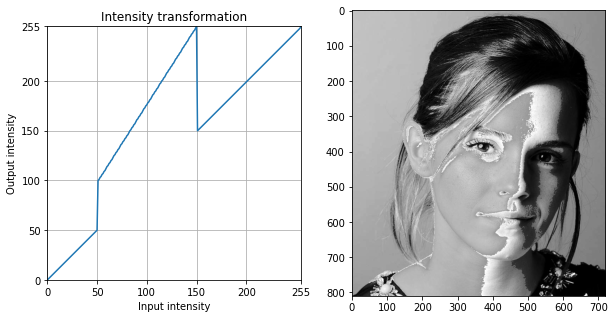

In [48]:
img  = cv.imread(r"D:/04 SEMESTER/EN2550 Fundamentals of Image Processing and Machine Vision/Assignment 01 - Intensity transformation and neighborhood filtering/emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert img is not None 

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
#assert len(t)==256

fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].plot(t)
ax[0].set_title("Intensity transformation")
ax[0].set_aspect('equal')
ax[0].grid()
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")

ax[0].set_xlim(0,255)
ax[0].set_xticks([0,50,100,150,200,255])

ax[0].set_ylim(0,255)
ax[0].set_yticks([0,50,100,150,200,255])
g = cv.LUT(img,t)

ax[1].imshow(g,cmap='gray')

plt.show()